### Lecture 5 Problems 








In [2]:
# For drawing: 
!pip3 install drawSvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 69 kB 6.0 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=be270c2709bb4c86a0fc71f68368fa5dd09b34f5c2f9dc4b28e2a617e7b07935
  Stored in directory: /root/.cache/pip/wheels/7a/2b/da/aec872f95d2c24105496ef149a9a576f52daf686f8f2127541
Successfully built cairocffi


In [3]:
import drawSvg as draw



def drawLine(canvas, start, end, strokewidth=0.03):
    canvas.append(
        draw.Lines(
            start[0],
            start[1],
            end[0],
            end[1],
            close=False,
            fill='black',
            stroke='black',
            stroke_width=strokewidth,
        )
    )


In [4]:
 # Make a blank canvas, call it 'canvas'
canvas = draw.Drawing(width = 2, height = 2, origin='center')
canvas.setRenderSize(900)  

drawLine(canvas, (0,0),(1,2), strokewidth=0.005)



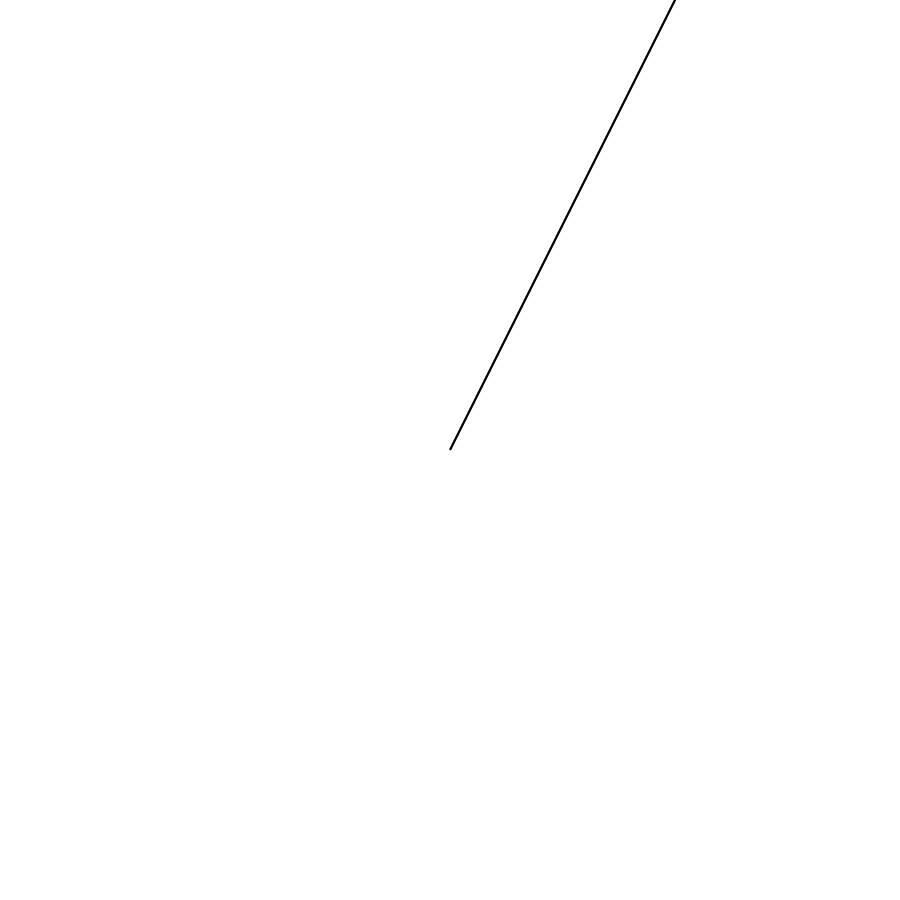

In [5]:
# show the canvas
canvas.rasterize()


0. Write a function that takes a parameter n and returns a list of the numbers from 0 to n-1 inclusive.


In [6]:
def func(n):
  return [i for i in range(n)]


1. Write a function that takes a parameter n and returns a list of all **unordered** pairs of numbers between 0 and n-1, **without duplicates**.
E.g. f(3)=(1,2), (1,3), (2,3).

In [7]:
def f(n):
  pair_list = []
  for i in range(n-1): 
    for j in range(i+1, n):
        temp = (i, j)
        pair_list.append(temp)
  return pair_list

In [8]:
f(3)

[(0, 1), (0, 2), (1, 2)]

2. Recall the concept of an adjacency list we introduced last lecture. 
Write a function that generates the adjacency list of a random graph with n vertices and edge probability p.

In [9]:
import random

def random_adjacency(n,p):
  adjacency_list = [[] for i in range(n)]

  for i, j in f(n):
    if random.random() < p:
      adjacency_list[i].append(j)
      adjacency_list[j].append(i)

  return adjacency_list

In [10]:
random_adjacency(4, 0.5)

[[1], [0, 2, 3], [1, 3], [1, 2]]

3. Write a function that takes an angle and outputs the (x,y) coordinate of that angle on the unit circle. E.g. f(0)=(1,0), f(pi/2)=(0,1).

In [11]:
import math

def coordinate(angle):
  return (math.cos(angle), math.sin(angle))

In [12]:
print(coordinate(0))
print(coordinate((math.pi)/2))
print(coordinate((math.pi)/6))

(1.0, 0.0)
(6.123233995736766e-17, 1.0)
(0.8660254037844387, 0.49999999999999994)


4. Write a function that draws a line between the points ζ^k and ζ^l on the unit circle. Here ζ is the nth root of unity.

In [13]:
import math

def unity_line(n):
  canvas = draw.Drawing(width = 2, height = 2, origin='center')
  canvas.setRenderSize(900)

  factor = 2*math.pi/n

  for i in range(n):
    drawLine(canvas, coordinate(i*factor), coordinate((i+1)*factor), 'black', strokewidth=0.005)  
  
  return canvas
  

In [14]:
unity_line(7).rasterize()

TypeError: ignored

5. Write a function that draws the random graph you generated in Q2. Arrange the vertices in a circle.

In [15]:
def draw_graph(g):
  print(g)
  canvas = draw.Drawing(width = 2, height = 2, origin='center')
  canvas.setRenderSize(900) 
  vertices = []
  angle = 0
  for i in range(len(g)):
    vertices.append(coordinate(angle))
    angle += 2*math.pi/len(g)

  for i in range(len(g)):
    for j in g[i]:
      drawLine(canvas, vertices[i], vertices[j], strokewidth=0.005)
  return canvas
  

[[], [3], [3], [1, 2]]


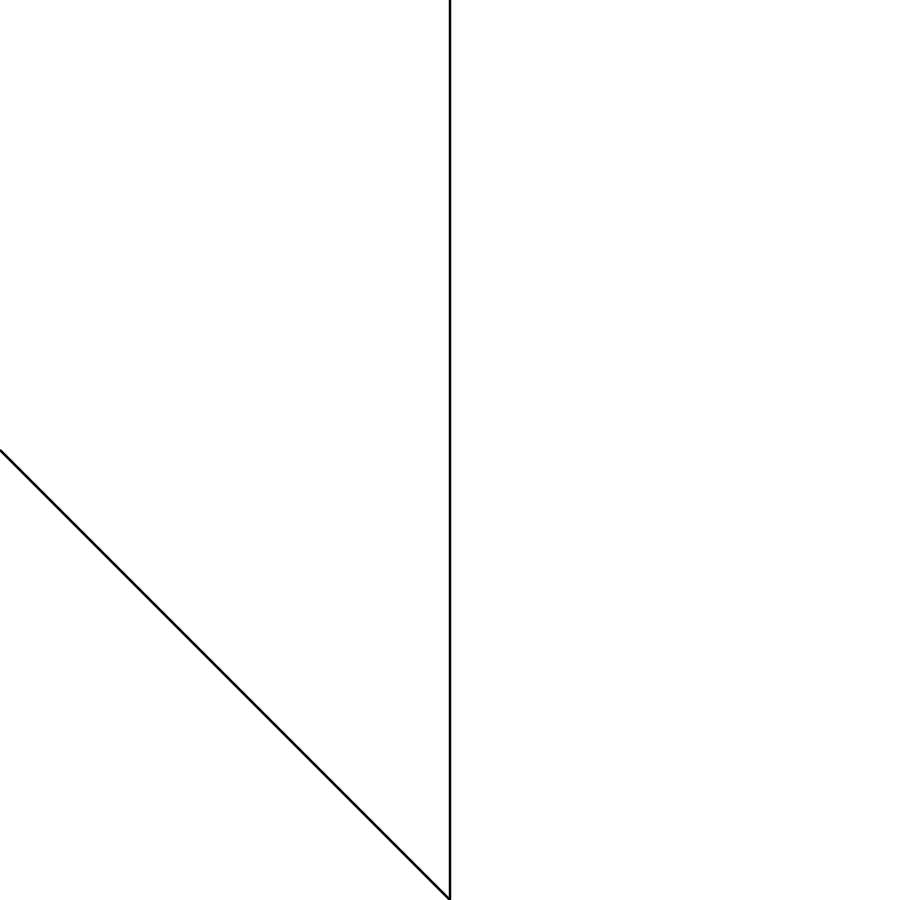

In [16]:
draw_graph(random_adjacency(4, 0.5)).rasterize()

6. Write a function that finds the vertices contained in the largest component of this graph. (hint: see previous HW).

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]


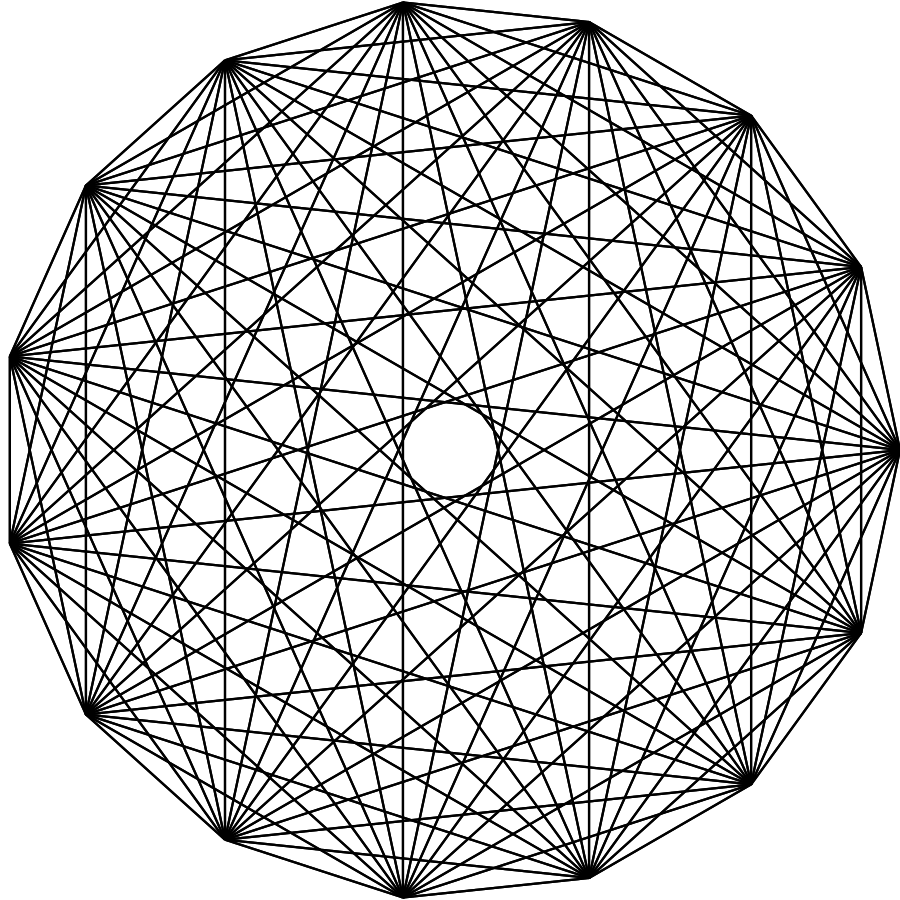

In [17]:
def largest_component(graph):
  numVertices = len(graph)
  seen = set()
  components = []
  for v in range(numVertices):
    if v not in seen:
      component = set()
      unexplored = {v}
      while unexplored:
        active = unexplored.pop()
        seen.add(active)
        component.add(active)
        #print(component)
        for w in graph[active]:
          if w not in seen:
            unexplored.add(w)
      components.append(component)
      #print(components)
  return max(components, key=len)

test = random_adjacency(15, 1)
print(largest_component(test))
draw_graph(test).rasterize()

7. Write a function that draws the graph, with the largest component highlighted in blue. Can you think of some other ways to visualize the graph? Could you separate the connected components and draw them separately, so that the graph is less tangled?

In [ ]:
test = random_adjacency(17, 0.1)
print(largest_component(test))

def highlight_component(graph):
  canvas = draw_graph(graph)
  
  vertices = []
  angle = 0
  for i in range(len(graph)):
    vertices.append(coordinate(angle))
    angle += 2*math.pi/len(graph)

  for i in largest_component(graph):
    for j in graph[i]:
      drawLine(canvas, vertices[i], vertices[j], strokewidth=0.02)
  
  return canvas

highlight_component(test).rasterize()

8. In the following, set p=t/n and n=10000. Plot the average size of the largest component vs t as t ranges from 0 to 2, with appropriate increments. This is a simple example of a phase transition.